<a href="https://colab.research.google.com/github/Dhruvilpatel04/AI_LAB_notebooks/blob/main/CNN_AI_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2
import os

from keras.utils import array_to_img, img_to_array, to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Flatten,MaxPool2D , Dense
from keras.optimizers import Adam

In [ ]:
corn_path = '/content/drive/MyDrive/Plant_images/Corn_(maize)___Common_rust_'
potato_path = '/content/drive/MyDrive/Plant_images/Potato___Early_blight'
tomato_path = '/content/drive/MyDrive/Plant_images/Tomato___Bacterial_spot'

In [ ]:
print(len(os.listdir(corn_path)))
print(len(os.listdir(potato_path)))
print(len(os.listdir(tomato_path)))

300
300
300


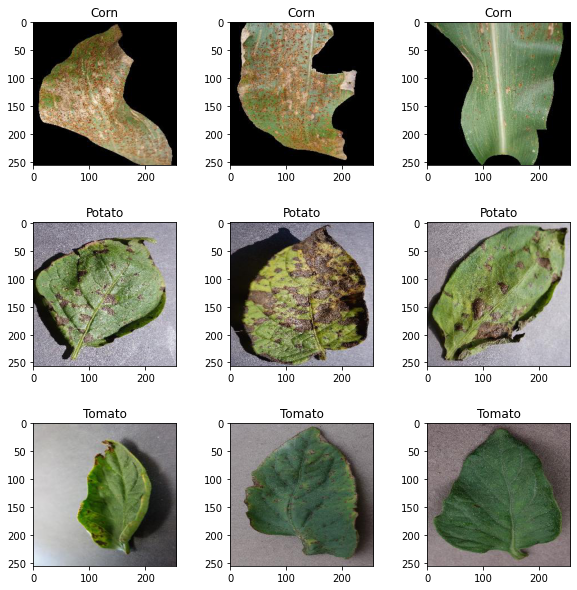

In [ ]:
m = 0
fig,axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.ravel()
plt.subplots_adjust(hspace = 0.4)
for i in range(3):
  img = plt.imread(corn_path + '/' + random.choice(os.listdir(corn_path)))
  axes[m].imshow(img)
  axes[m].set_title('Corn')
  m+=1

for i in range(3):
  img = plt.imread(potato_path + '/' + random.choice(os.listdir(potato_path)))
  axes[m].imshow(img)
  axes[m].set_title('Potato')
  m+=1

for i in range(3):
  img = plt.imread(tomato_path + '/' + random.choice(os.listdir(tomato_path)))
  axes[m].imshow(img)
  axes[m].set_title('Tomato')
  m+=1


In [ ]:
def convert_image_to_array(path):
  try:
    image = cv2.imread(path)
    if image is not None:
      image = cv2.resize(image , (256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except exception as e:
    print('Error',e)

In [ ]:
path = '/content/drive/MyDrive/Plant_images'
root_dir = os.listdir(path)
print(root_dir)

['Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Tomato___Bacterial_spot']


In [ ]:
image_list, image_label = [],[]
temp = -1
for dir in root_dir:
  all_image_list = os.listdir(path + '/' + dir)
  temp += 1
  for file in all_image_list:
    new_path = path + '/' + dir + '/'  + file
    image_list.append(convert_image_to_array(new_path))
    image_label.append(temp)

In [ ]:
len(image_list)

900

In [ ]:
np.unique(image_label , return_counts = True)

(array([0, 1, 2]), array([300, 300, 300]))

In [ ]:
norm_image = np.array(image_list,dtype = np.float16)/255.0

In [ ]:
norm_image.shape

(900, 256, 256, 3)

In [ ]:
model=Sequential()
model.add(Conv2D(16,(3,3),input_shape = (256,256,3),activation='relu'))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(23,activation='relu'))
model.add(Dense(3,activation='Softmax'))


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 conv2d_22 (Conv2D)          (None, 252, 252, 16)      2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 84, 84, 16)       0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 82, 82, 16)        2320      
                                                                 
 conv2d_24 (Conv2D)          (None, 80, 80, 16)        2320      
                                                                 
 flatten_6 (Flatten)         (None, 102400)            0         
                                                      

In [ ]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(norm_image, image_label, random_state=0)


In [ ]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.001), metrics = ['accuracy'])

In [ ]:
hist = model.fit(xtrain,ytrain, epochs = 5 , batch_size = 32,validation_split = 0.2)

Epoch 1/5
17/17 [==============================] - 12s 130ms/step - loss: 0.5300 - accuracy: 0.7907 - val_loss: 0.1202 - val_accuracy: 0.9556
Epoch 2/5
17/17 [==============================] - 1s 61ms/step - loss: 0.1246 - accuracy: 0.9630 - val_loss: 0.1219 - val_accuracy: 0.9704
Epoch 3/5
17/17 [==============================] - 1s 57ms/step - loss: 0.0639 - accuracy: 0.9796 - val_loss: 0.1540 - val_accuracy: 0.9556
Epoch 4/5
17/17 [==============================] - 1s 58ms/step - loss: 0.0170 - accuracy: 0.9981 - val_loss: 0.1675 - val_accuracy: 0.9630
Epoch 5/5
17/17 [==============================] - 1s 60ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0469 - val_accuracy: 0.9926


In [ ]:
ypred = model.predict(xtest)

8/8 [==============================] - 0s 24ms/step


In [ ]:
actual = np.argmax(ytest, axis = 1)
pred = np.argmax(ypred, axis =1)

In [ ]:
ytest

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actual,pred)

0.9955555555555555